In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import pandas_datareader as pdr
import datetime as dt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Also see

https://medium.com/datawiz-th/%E0%B8%A1%E0%B8%B2%E0%B8%A5%E0%B8%AD%E0%B8%87-forecast-%E0%B8%A3%E0%B8%B2%E0%B8%84%E0%B8%B2%E0%B8%AB%E0%B8%B8%E0%B9%89%E0%B8%99%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%87%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B9%86-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-deep-learning-lstm-python-305c480db223


LSTM Model Architecture for Rare Event Time Series Forecasting
https://machinelearningmastery.com/lstm-model-architecture-for-rare-event-time-series-forecasting/

How to Use Weight Regularization with LSTM Networks for Time Series Forecasting
https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/

How to Use Dropout with LSTM Networks for Time Series Forecasting
https://machinelearningmastery.com/use-dropout-lstm-networks-time-series-forecasting/

Stateful and Stateless LSTM for Time Series Forecasting with Python
https://machinelearningmastery.com/stateful-stateless-lstm-time-series-forecasting-python/

How to Use Features in LSTM Networks for Time Series Forecasting
https://machinelearningmastery.com/use-features-lstm-networks-time-series-forecasting/

How to Use Timesteps in LSTM Networks for Time Series Forecasting
https://machinelearningmastery.com/use-timesteps-lstm-networks-time-series-forecasting/

How to Update LSTM Networks During Training for Time Series Forecasting
https://machinelearningmastery.com/update-lstm-networks-training-time-series-forecasting/

How to Tune LSTM Hyperparameters with Keras for Time Series Forecasting
https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/

How To Backtest Machine Learning Models for Time Series Forecasting
https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

How to Grid Search Deep Learning Models for Time Series Forecasting
https://machinelearningmastery.com/how-to-grid-search-deep-learning-models-for-time-series-forecasting/


How to Load, Visualize, and Explore a Multivariate Multistep Time Series Dataset
https://machinelearningmastery.com/how-to-load-visualize-and-explore-a-complex-multivariate-multistep-time-series-forecasting-dataset/


How to Develop Deep Learning Models for Univariate Time Series Forecasting
https://machinelearningmastery.com/how-to-develop-deep-learning-models-for-univariate-time-series-forecasting/


Comparing Classical and Machine Learning Algorithms for Time Series Forecasting
https://machinelearningmastery.com/findings-comparing-classical-and-machine-learning-methods-for-time-series-forecasting/


How to Create an ARIMA Model for Time Series Forecasting in Python
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


How to Grid Search ARIMA Model Hyperparameters with Python
https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

How to Make Manual Predictions for ARIMA Models with Python
https://machinelearningmastery.com/make-manual-predictions-arima-models-python/

How to Make Out-of-Sample Forecasts with ARIMA in Python
https://machinelearningmastery.com/make-sample-forecasts-arima-python/

How to Model Volatility with ARCH and GARCH for Time Series Forecasting in Python
https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/

On the Suitability of Long Short-Term Memory Networks for Time Series Forecasting
https://machinelearningmastery.com/suitability-long-short-term-memory-networks-time-series-forecasting/

The Promise of Recurrent Neural Networks for Time Series Forecasting
https://machinelearningmastery.com/promise-recurrent-neural-networks-time-series-forecasting/

Time Series Forecasting with Python 7-Day Mini-Course
https://machinelearningmastery.com/time-series-forecasting-python-mini-course/


Understand Time Series Forecast Uncertainty Using Prediction Intervals with Python
https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/


In [ ]:
stocks = ['ADVANC', 'AOT', 'BANPU', 'BBL', 'BDMS', 'BEM', 'BGRIM', 'BH', 'BJC', 'BTS']
start = dt.datetime(2015,1,1)
end = dt.datetime(2018,12,31) # end is optional

df = pd.DataFrame()
dataset = {}
for s in stocks:
    try:
        data = pdr.get_data_yahoo('%s.BK' % s,start=start,end=end)
        data['ticker'] = s # add ticker to column
        data['adj_close'] = data['Adj Close']
        dataset[s] = data[['ticker', 'adj_close']] # Need two columns
        df = pd.concat([df, dataset[s]])
    except Exception as e:
        print("Error: %s %s" % (s, str(e)))


table = df.pivot(columns='ticker')
table

adj_close                        ...                                 
ticker          ADVANC        AOT      BANPU  ...          BH        BJC       BTS
Date                                          ...                                 
2015-01-05  193.482346  17.388660  13.586685  ...  124.851227  34.331398  7.222334
2015-01-06  191.928238  17.324968  13.697172  ...  125.752670  33.702496  7.449214
2015-01-07  196.590500  18.025608  13.807662  ...  125.752670  34.544136  7.487027
2015-01-08  194.259384  18.407776  13.807662  ...  126.654137  34.960304  7.524838
2015-01-09  192.705292  18.535168  14.083771  ...  124.851227  34.756870  7.524838
...                ...        ...        ...  ...         ...        ...       ...
2018-12-24  163.651642  64.083893  14.114557  ...  185.820419  51.096230  9.048749
2018-12-25  162.228592  61.865604  13.588550  ...  181.543243  48.916767  8.861211
2018-12-26  161.754242  63.097988  13.500880  ...  182.018463  49.401096  8.861211
2018-12-27  160.805542  62.358559  13.500880  ...  175.365051  48.432446  8.814325
2018-12-28  163.651642  63.344463  12.974873  ...  178.216507  49.158932  8.954980

[975 rows x 10 columns]

Text(0, 0.5, 'price in THB')

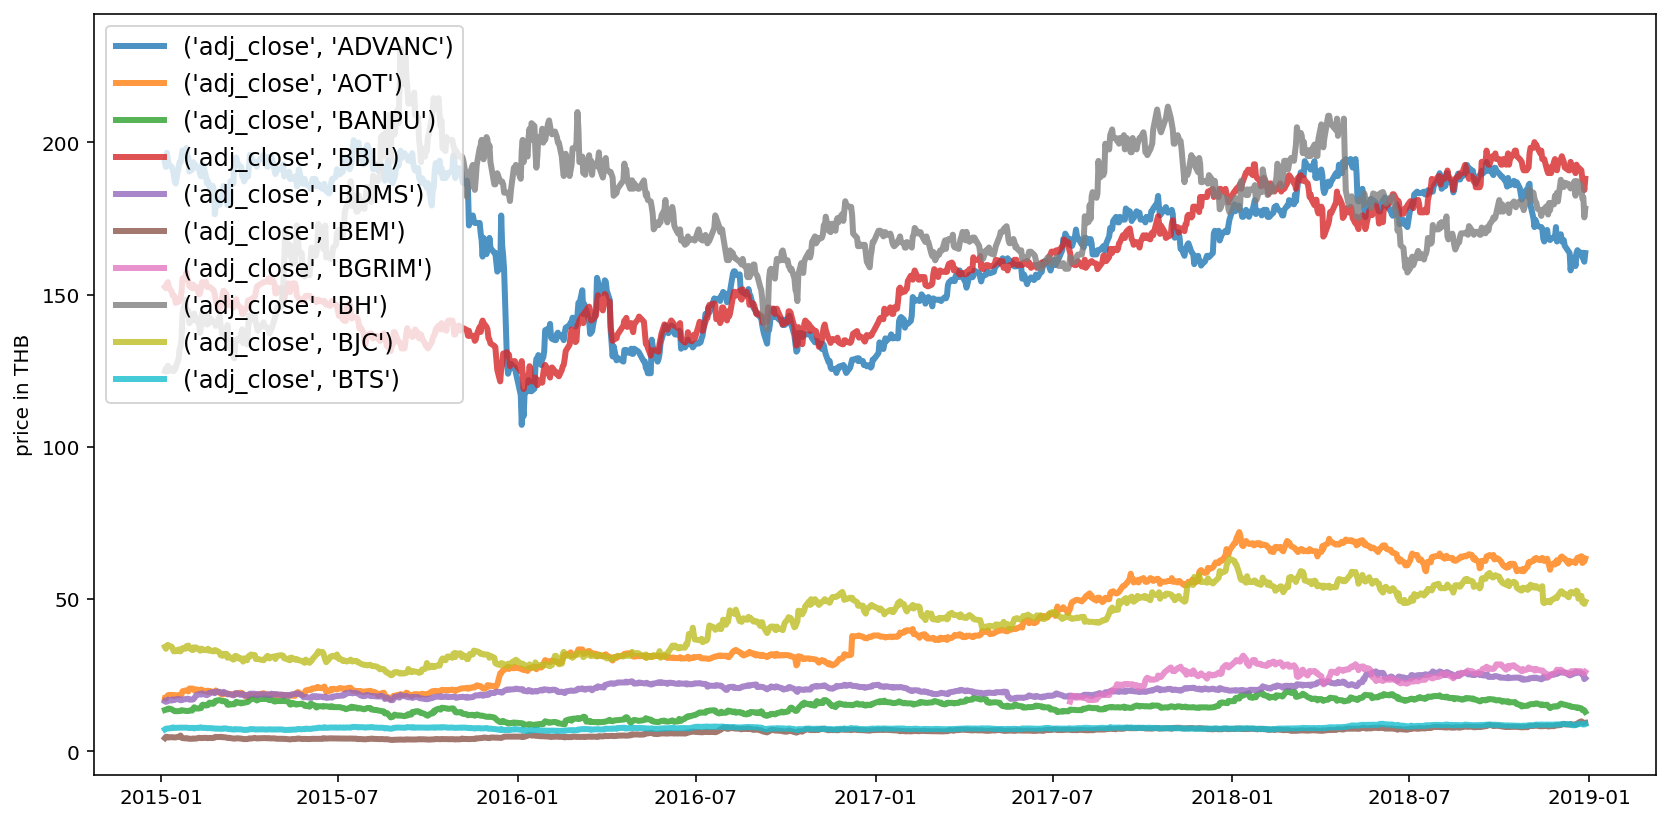

In [ ]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


plt.figure(figsize=(14, 7)) 
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c) 
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in THB')

In [ ]:
df0 = df

# df0.iloc[:,1:2].values

s1 = df0[df0.ticker=="ADVANC"].iloc[:,1:2].values
# df = table[('adj_close', 'ADVANC')]

testing = s1[-50:]
# testing.plot()

testing.shape

(50, 1)

In [ ]:
training = s1[:-50]
# training.plot()
# training.head()


In [ ]:
trainset = training
# trainset = trainset.reshape(-1, 1) 


In [ ]:
# training.iloc[:,0:1].values

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [ ]:
training_scaled.shape

(925, 1)

In [ ]:
X_train = training_scaled[0:len(training) - 1]
y_train = training_scaled[1:len(training)]

In [ ]:
# The use of LSTM (and RNN) involves the prediction of a particular value along time. 
# Our input is currently 2-dimensional — we have 1257 rows and 1 column. 
# We need to add another dimension to the input to account for time. This process is called reshaping. 
# This format of the input is required by Keras and the arguments have to be in the order of batch_size (number of rows), timesteps (the number of time intervals or days between any 2 rows, in this case, it will be 1) and input_dim (number of columns). These 3 arguments are encapsulated together and come after the original data as the argument of Numpy’s reshape function.

X_train = np.reshape(X_train, (len(training) - 1, 1, 1))

X_train.shape, y_train.shape

((924, 1, 1), (924, 1))

In [ ]:
# Build nets
# regressor = Sequential()
# regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
# regressor.add(Dense(units = 1))
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



# Can train. But doesn't help much with result.
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'sigmoid', input_shape = (None, 1), return_sequences=True))
regressor.add(LSTM(units = 50, activation = 'sigmoid', return_sequences=True))
regressor.add(LSTM(units = 50, activation = 'sigmoid'))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
924/924 [==============================] - 1s 1ms/step - loss: 0.1411
Epoch 2/200
924/924 [==============================] - 0s 146us/step - loss: 0.0637
Epoch 3/200
924/924 [==============================] - 0s 162us/step - loss: 0.0600
Epoch 4/200
924/924 [==============================] - 0s 139us/step - loss: 0.0596
Epoch 5/200
924/924 [==============================] - 0s 154us/step - loss: 0.0596
Epoch 6/200
924/924 [==============================] - 0s 149us/step - loss: 0.0595
Epoch 7/200
924/924 [==============================] - 0s 147us/step - loss: 0.0594
Epoch 8/200
924/924 [==============================] - 0s 173us/step - loss: 0.0594
Epoch 9/200
924/924 [==============================] - 0s 169us/step - loss: 0.0589
Epoch 10/200
924/924 [==============================] - 0s 173us/step - loss: 0.0588
Epoch 11/200
924/924 [==============================] - 0s 150us/step - loss: 0.0588
Epoch 12/200
924/924 [==============================] - 0s 150us/step - loss

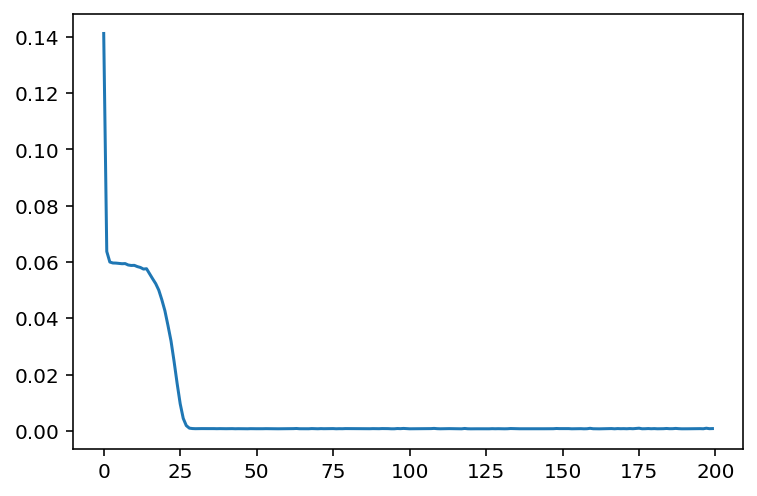

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])

In [ ]:
X_train.shape, y_train.shape

((924, 1, 1), (924, 1))

In [ ]:
real_stock_price = testing
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (50, 1, 1))
inputs

array([[[0.84182022]],

       [[0.84689303]],

       [[0.851966  ]],

       [[0.83167396]],

       [[0.79109005]],

       [[0.80630912]],

       [[0.81138209]],

       [[0.82660116]],

       [[0.80123599]],

       [[0.84182022]],

       [[0.84689303]],

       [[0.77079818]],

       [[0.72514114]],

       [[0.694703  ]],

       [[0.72006817]],

       [[0.70992207]],

       [[0.69977613]],

       [[0.694703  ]],

       [[0.694703  ]],

       [[0.6896302 ]],

       [[0.65411909]],

       [[0.64397332]],

       [[0.68455707]],

       [[0.65411909]],

       [[0.65411909]],

       [[0.64904612]],

       [[0.65411909]],

       [[0.65919206]],

       [[0.65919206]],

       [[0.694703  ]],

       [[0.64397332]],

       [[0.66426519]],

       [[0.66933816]],

       [[0.64397332]],

       [[0.64904612]],

       [[0.62875425]],

       [[0.60846238]],

       [[0.60338908]],

       [[0.5425133 ]],

       [[0.57802424]],

       [[0.58817018]],

       [[0.55773

In [ ]:
predicted_stock_price = regressor.predict(inputs) 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

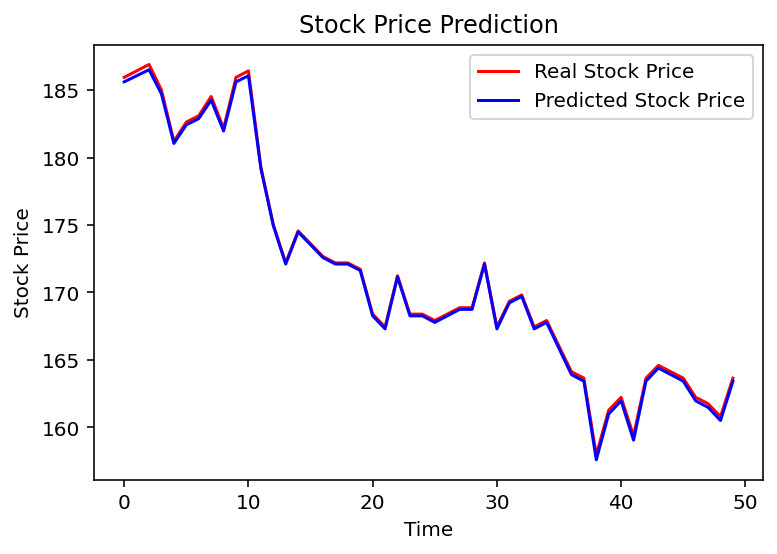

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction') 
plt.xlabel('Time')
plt.ylabel('Stock Price') 
plt.legend()
plt.show()

In [ ]:
regressor.predict(np.reshape(inputs[32], (1, 1, 1)))

array([[0.6681556]], dtype=float32)

In [ ]:
inputs[32]

array([[0.66933816]])

In [ ]:
inputs[33]

array([[0.64397332]])

In [ ]:
regressor.predict(np.reshape(inputs[32:40], (len(inputs[32:40]), 1, 1)))

array([[0.6681556 ],
       [0.6423924 ],
       [0.6475542 ],
       [0.62688226],
       [0.606156  ],
       [0.60096747],
       [0.53862333],
       [0.5750011 ]], dtype=float32)

In [ ]:
inputs[32:40]

array([[[0.66933816]],

       [[0.64397332]],

       [[0.64904612]],

       [[0.62875425]],

       [[0.60846238]],

       [[0.60338908]],

       [[0.5425133 ]],

       [[0.57802424]]])

In [ ]:
sc.inverse_transform(regressor.predict(np.reshape(inputs[32:40], (len(inputs[32:40]), 1, 1))))

array([[169.70766],
       [167.29866],
       [167.78133],
       [165.84839],
       [163.91035],
       [163.4252 ],
       [157.59569],
       [160.99721]], dtype=float32)

In [ ]:
sc.inverse_transform(np.reshape(inputs[32:40], (len(inputs[32:40]), 1)))

array([[169.8182373 ],
       [167.44648743],
       [167.92082214],
       [166.02342224],
       [164.12602234],
       [163.65164185],
       [157.95942688],
       [161.27989197]])

In [ ]:
# Dynamic prediction. Tomorrow's prediction is feed into the model to make next day's prediction
regressor

In [ ]:
recent = np.reshape(training_scaled[-20:], (len(training_scaled[-20:]), 1, 1))
recent.shape

(20, 1, 1)

In [ ]:
prediction = regressor.predict(recent)
prediction.shape

(20, 1)

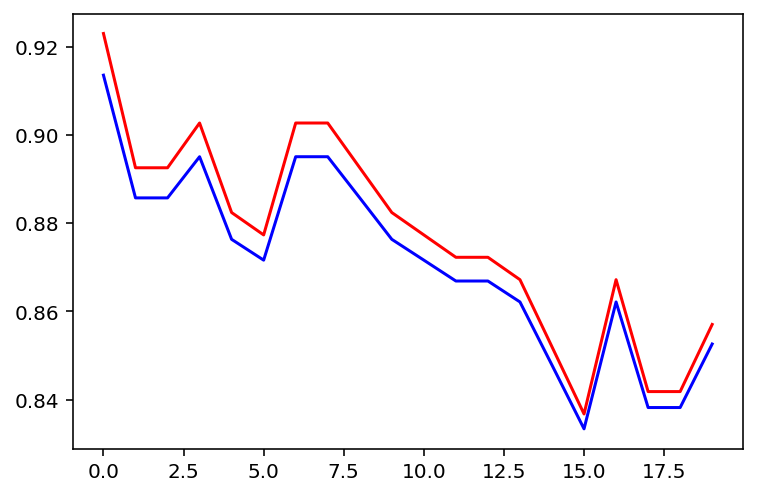

In [ ]:
# Last 20 points from training compare with tomorrow's prediction from model

plt.plot(np.reshape(recent, (len(recent), 1)), color = 'red', label = 'Real Stock Price')
plt.plot(prediction, color = 'blue', label = 'Predicted Stock Price')
plt.show()

In [ ]:
np.concatenate((recent, np.reshape(prediction[-1:], (1, 1, 1))))

array([[[0.92298804]],

       [[0.89255007]],

       [[0.89255007]],

       [[0.90269601]],

       [[0.88240397]],

       [[0.877331  ]],

       [[0.90269601]],

       [[0.90269601]],

       [[0.89255007]],

       [[0.88240397]],

       [[0.877331  ]],

       [[0.87225803]],

       [[0.87225803]],

       [[0.8671849 ]],

       [[0.851966  ]],

       [[0.83674693]],

       [[0.8671849 ]],

       [[0.84182022]],

       [[0.84182022]],

       [[0.85703913]],

       [[0.8526035 ]]])

In [ ]:
prediction[-1:]

array([[0.8526035]], dtype=float32)

In [ ]:
# Use last 20 to predict next
prediction = regressor.predict(recent[1:])
prediction

array([[0.88572276],
       [0.88572276],
       [0.8950558 ],
       [0.8763309 ],
       [0.8716133 ],
       [0.8950558 ],
       [0.8950558 ],
       [0.88572276],
       [0.8763309 ],
       [0.8716133 ],
       [0.86688167],
       [0.86688167],
       [0.8621359 ],
       [0.84781635],
       [0.83337647],
       [0.8621359 ],
       [0.8382031 ],
       [0.8382031 ],
       [0.8526035 ]], dtype=float32)

In [ ]:
def walk_forward(training, recent_days=20, forward_days=10):
    recent = np.reshape(training[-recent_days:], (len(training[-recent_days:]), 1, 1))
    recent.shape
    forecast = []
    for d in range(forward_days):
      prediction = regressor.predict(recent)
      # Add new result to recent
      recent = np.concatenate((recent, np.reshape(prediction[-1:], (1, 1, 1))))
      # Add to forecast list
      forecast.append(prediction[-1:])
      recent = recent[1:] # update recent data use for next forecasting
    return forecast
fcast = walk_forward(training_scaled)

In [ ]:
fcast = np.reshape(np.array(fcast), (len(fcast), 1))
fcast

array([[0.8526035 ],
       [0.8484186 ],
       [0.84446114],
       [0.8407104 ],
       [0.8371484 ],
       [0.833759  ],
       [0.830528  ],
       [0.8274427 ],
       [0.8244916 ],
       [0.8216648 ]], dtype=float32)

In [ ]:
sc.inverse_transform(fcast)

array([[186.95454],
       [186.56322],
       [186.19319],
       [185.84247],
       [185.5094 ],
       [185.19247],
       [184.89035],
       [184.60187],
       [184.32593],
       [184.0616 ]], dtype=float32)

In [ ]:
training[-20:]

array([[193.53587341],
       [190.6897583 ],
       [190.6897583 ],
       [191.63845825],
       [189.74104309],
       [189.26669312],
       [191.63845825],
       [191.63845825],
       [190.6897583 ],
       [189.74104309],
       [189.26669312],
       [188.79234314],
       [188.79234314],
       [188.31797791],
       [186.89492798],
       [185.47186279],
       [188.31797791],
       [185.94624329],
       [185.94624329],
       [187.36929321]])

4 units
```
array([[193.53587341],
       [190.6897583 ],
       [190.6897583 ],
       [191.63845825],
       [189.74104309],
       [189.26669312],
       [191.63845825],
       [191.63845825],
       [190.6897583 ],
       [189.74104309],
       [189.26669312],
       [188.79234314],
       [188.79234314],
       [188.31797791],
       [186.89492798],
       [185.47186279],
       [188.31797791],
       [185.94624329],
       [185.94624329],
       [187.36929321]])


array([[187.40202],
       [187.43211],
       [187.4598 ],
       [187.48523],
       [187.5086 ],
       [187.53012],
       [187.54988],
       [187.56802],
       [187.5847 ],
       [187.6    ]], dtype=float32)
```